<a href="https://colab.research.google.com/github/Siddharth-cmd/COVID-19-detector-using-CNN/blob/master/COVID_19_USING_CNN_by_Siddharth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
# dataset for covid-19
!wget http://cb.lk/covid_19

--2020-05-18 09:21:55--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-18 09:21:56--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-18 09:21:57--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-18 09:21:57--  https://www.dropbox.com/s/raw/7rjw

In [0]:
# unzip the covid-19 folder
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [0]:
Train_path = 'CovidDataset/Train'
val_path = 'CovidDataset/Val'

In [0]:
# build the model
import matplotlib.pyplot as plt
import numpy as np
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape= (224,224,3)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 746496)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               382206464 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [0]:
# compiling the model
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [0]:
# image generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip=True,zoom_range = 0.5,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.5,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(Train_path,
                                                    target_size = (224,224),
                                                    shuffle = True,
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip=True, zoom_range=0.5,
                                        rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.5,
                                        fill_mode = 'nearest')
validation_generator = validation_datagen.flow_from_directory(val_path,
                                                              target_size = (224,224),
                                                              shuffle = True,
                                                              batch_size = 32,
                                                              class_mode = 'binary')


Found 60 images belonging to 2 classes.


In [0]:
history  = model.fit_generator(train_generator,
                               steps_per_epoch = 8,
                               epochs = 10,
                               validation_data = validation_generator,
                               validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 31.0437 - accuracy: 0.5938 - val_loss: 1.3302 - val_accuracy: 0.6833
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.9184 - accuracy: 0.6328 - val_loss: 0.4689 - val_accuracy: 0.7833
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.5138 - accuracy: 0.7656 - val_loss: 0.5801 - val_accuracy: 0.6833
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.5052 - accuracy: 0.7695 - val_loss: 0.4365 - val_accuracy: 0.8333
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.4387 - accuracy: 0.8164 - val_loss: 0.3657 - val_accuracy: 0.9167
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 0.4380 - accuracy: 0.8086 - val_loss: 0.4039 - val_accuracy: 0.7833
Epoch 7/10
8/8 [==============================] - 14s 2s/step - loss: 0.4127 - accuracy: 0.8203

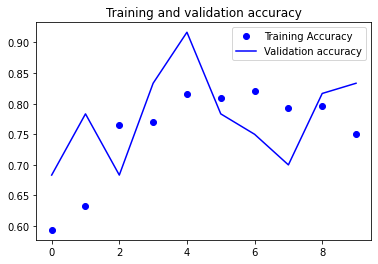

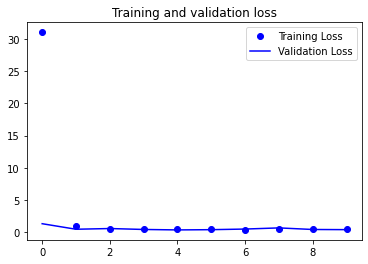

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.show()
